<a href="https://colab.research.google.com/github/OConnorsphysics/Uleth_Data_Science/blob/main/docs/introModeling/IntroModeling3_decisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=1WZbnKvEzIK70qhQXyPIS36ahLWoEsqaA' width=500>

***

## <font color='darkorange'>Decision trees</font>

Let's take a look at decision trees as classifiers. Here we will use this algorithm to classify which grape plant was used to create a wine. 

Load in the needed libraries

In [2]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### <font color='darkorange'>Load the data</font>

Get the 'wine.csv' from the class's shared data folder and load it into a dataframe.

In [48]:
#get wine to a dataframe
df_wine = pd.read_csv('/content/wine_labs.csv')

#take a look
df_wine.head(3)



,alcohol,malic_acid,ash,total_sugar,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,plant,lab
0,14.23,1.71,2.43,2.44,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,plantA,lab1
1,13.20,1.78,2.14,2.76,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,plantA,lab2
2,13.16,2.36,2.67,1.24,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,plantA,lab3


<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100" align = 'left'>  

Q: what kinds of data are we dealing with?

In [9]:
df_wine.describe()

,alcohol,malic_acid,ash,total_sugar,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,175.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,2.006057,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,0.522862,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,0.690000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,1.680000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,1.970000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,2.375000,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,3.340000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df_wine.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
total_sugar                     float64
alcalinity_of_ash               float64
magnesium                         int64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                           int64
plant                            object
lab                              object
dtype: object

Q: are there any missing values?

In [11]:
df_wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
total_sugar                     3
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
plant                           0
lab                             0
dtype: int64

In [49]:
#let's drop rows with missing data
df_wine.dropna(axis=0,inplace=True)

### <font color='darkorange'>Descriptive statistics</font> 

Let's take a little time to look at some summary statistics.
 
E.g., how many values of plant type there are? 

In [35]:
#count how many of each value in a column using value_conunts
df_wine.plant.value_counts()

plantB    70
plantA    57
plantC    48
Name: plant, dtype: int64

<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100">  

Choose one feature (column) and get the mean, min, and max.

In [36]:
df_wine['magnesium'].describe()

count    175.000000
mean      99.691429
std       14.289965
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: magnesium, dtype: float64

### <font color='darkorange'>Visualizing the data</font> 

Let's plot the relationships between plant type and some of the wine measures.
 
Q: Choose one or more wine measures and generate a plot that shows the relationship between that measure and plant type.

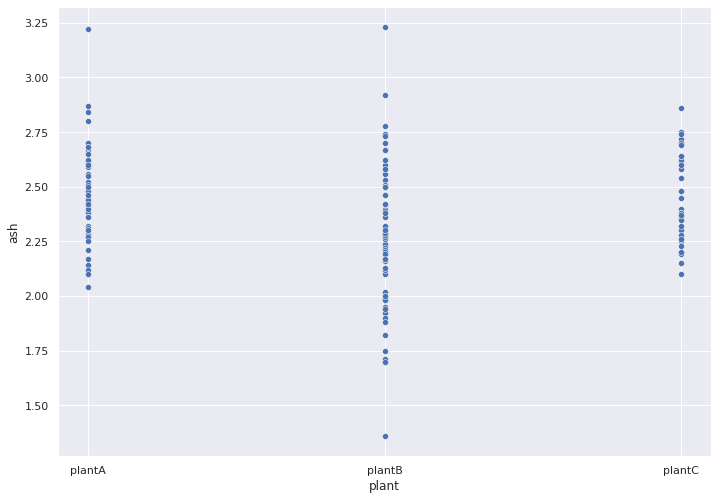

In [37]:
sns.scatterplot(data=df_wine, x='plant', y='ash')

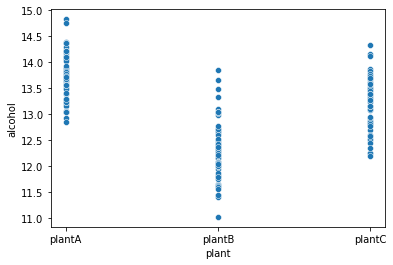

In [25]:
sns.scatterplot(data=df_wine, x='plant', y='alcohol')

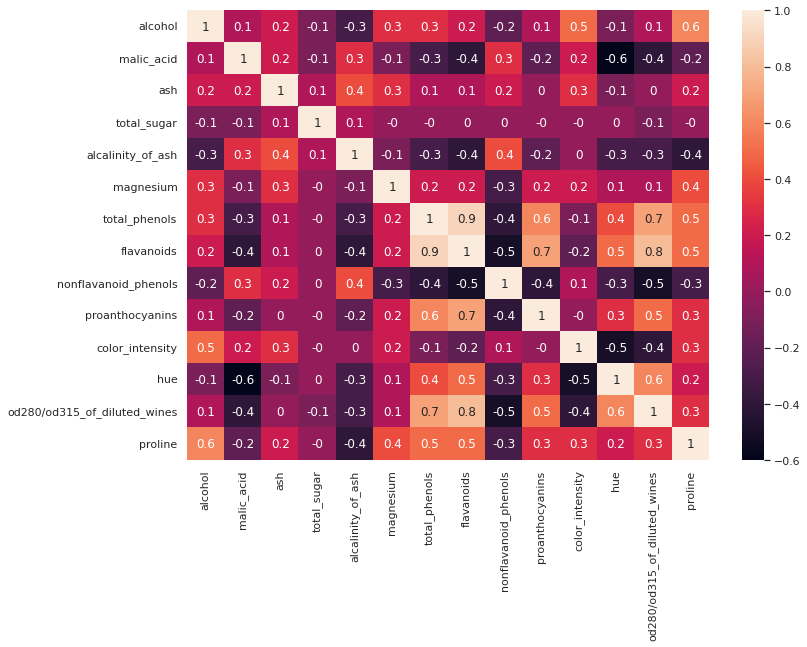

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=df_wine.corr().round(1), annot=True)

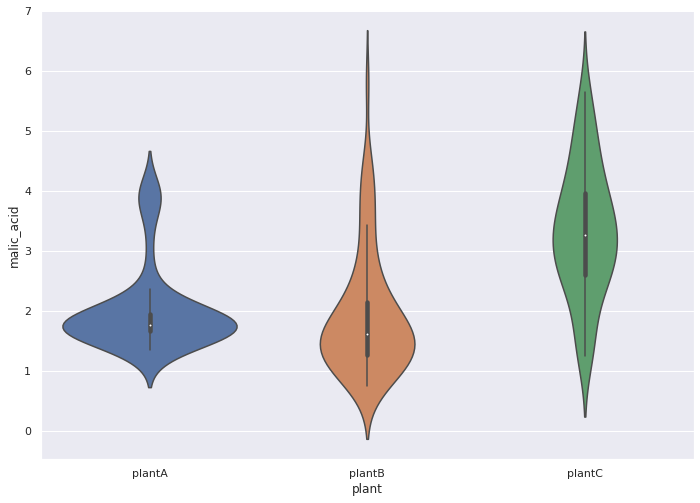

In [40]:
sns.violinplot(data=df_wine, x='plant', y='malic_acid')

### <font color='darkorange'>Data wrangling</font> 



In [50]:
one_hot_columns = ['lab']
ordinal_columns = ['plant']
scaling_columns = df_wine.select_dtypes(include='number').columns.tolist()

**Preprocessing (categorical input variables)\**
> Convert the categorical 'lab' variable using onehot encoding (i.e., create dummy columns).

In [51]:
#create dummy variables for each lab category
df_cat = pd.get_dummies(df_wine[one_hot_columns])
df_wine = pd.concat([df_wine, df_cat], axis=1)
df_wine

,alcohol,malic_acid,ash,total_sugar,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,plant,lab,lab_lab1,lab_lab2,lab_lab3
0,14.23,1.71,2.43,2.44,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,plantA,lab1,1,0,0
1,13.20,1.78,2.14,2.76,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,plantA,lab2,0,1,0
2,13.16,2.36,2.67,1.24,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,plantA,lab3,0,0,1
3,14.37,1.95,2.50,1.71,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,plantA,lab1,1,0,0
4,13.24,2.59,2.87,1.97,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,plantA,lab3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,1.86,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,plantC,lab3,0,0,1
174,13.40,3.91,2.48,2.82,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,plantC,lab1,1,0,0
175,13.27,4.28,2.26,1.06,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,plantC,lab3,0,0,1
176,13.17,2.59,2.37,2.40,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,plantC,lab1,1,0,0


In [52]:
#drop the lab coulmn
df_wine = df_wine.drop('lab', axis=1)

**Preprocessing (categorical target variable)**
> As the target variable is categorical we will convert each category into a number, and unlike the onehot encoding we will keep these numbers within the same column. convert plant from a,b,c to 1,2,3

In [53]:
from sklearn.preprocessing import OrdinalEncoder

#1 build an ordinal encoder
encoder1 = OrdinalEncoder()

#2 use encoder to transform the categorical rows you want
df_wine[ordinal_columns] = encoder1.fit_transform(df_wine[ordinal_columns])

#take a look
df_wine

,alcohol,malic_acid,ash,total_sugar,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,plant,lab_lab1,lab_lab2,lab_lab3
0,14.23,1.71,2.43,2.44,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0.0,1,0,0
1,13.20,1.78,2.14,2.76,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0.0,0,1,0
2,13.16,2.36,2.67,1.24,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0.0,0,0,1
3,14.37,1.95,2.50,1.71,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0.0,1,0,0
4,13.24,2.59,2.87,1.97,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,1.86,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2.0,0,0,1
174,13.40,3.91,2.48,2.82,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2.0,1,0,0
175,13.27,4.28,2.26,1.06,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2.0,0,0,1
176,13.17,2.59,2.37,2.40,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2.0,1,0,0


In [55]:
df_wine.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
total_sugar                     float64
alcalinity_of_ash               float64
magnesium                         int64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                           int64
plant                           float64
lab_lab1                          uint8
lab_lab2                          uint8
lab_lab3                          uint8
dtype: object

**Training testing split**

Here we change a little how we do the data splitting. Instead of spliting the dataframe into training and testing, we'll first split the dataframe into inputs and target variables. I.e., we'd like to use X to predict y. Then we split each into training and testing sets. This makes it easier to work with sklearn algorithms.

Don't scale data until it is split. This keeps the mean, std and other stats correct for the split data groups

In [58]:

#split data into predictors (X) and target (y)
X = df_wine.drop('plant', axis=1)
y = df_wine['plant']

#split these data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)



**Preprocessing (numeric variables)**
Scale any numeric values after splitting into training and testing sets.

In [59]:
from sklearn.preprocessing import StandardScaler

#1 build the scaler 
scaler1 = StandardScaler()

#2 apply it
X_train[scaling_columns] = scaler1.fit_transform(X_train[scaling_columns])
X_test[scaling_columns] = scaler1.transform(X_test[scaling_columns])

X_train

,alcohol,malic_acid,ash,total_sugar,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,lab_lab1,lab_lab2,lab_lab3
125,-1.107795,-0.230749,-0.746000,1.649748,0.409257,-0.989596,0.532864,0.707914,0.010594,-0.394619,-0.964631,-0.371977,0.939324,-1.186408,0,1,0
14,1.804421,-0.478918,0.050383,0.237667,-2.419400,0.145459,1.623749,1.696100,-0.613878,2.268471,1.058533,1.100343,0.559838,2.968954,1,0,0
17,1.111037,-0.735645,0.960536,1.391198,0.094962,1.013442,1.078307,1.456540,0.244771,0.217395,0.674388,0.797218,-0.022943,1.486673,0,0,1
67,-0.729585,-1.077948,-1.694076,-1.094860,-0.030756,-1.456971,-0.230756,0.059106,-0.769996,-0.907388,-0.145122,0.753915,1.210386,-0.717197,1,0,0
163,0.014228,0.873178,-0.063386,-0.537983,-0.376481,0.412530,-1.352809,-1.238512,0.244771,-1.072798,0.110975,-1.151441,-1.134295,-0.130683,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,-0.994332,-0.701415,-0.215078,0.476329,0.974989,-0.655756,-0.745030,-0.250326,0.478948,-0.047260,-1.096948,1.663289,-0.443088,-0.770517,0,1,0
133,-0.313554,0.958753,-0.025463,-0.040771,0.566405,0.412530,-0.869703,-0.739428,-1.550586,-1.238207,-0.008537,-0.718406,-1.757736,-0.397281,0,0,1
106,-0.880869,-0.598724,-0.935615,-0.080548,-0.219333,-1.323436,-0.947623,0.089051,0.010594,0.068527,-0.691461,0.234272,0.790241,-0.717197,0,1,0
41,0.581543,1.206923,-0.935615,-0.478318,-0.282192,-0.655756,0.299103,0.737859,-0.769996,-0.179587,-0.315853,-0.155460,0.559838,1.148983,0,0,1


In [60]:
X_train.describe()

,alcohol,malic_acid,ash,total_sugar,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,lab_lab1,lab_lab2,lab_lab3
count,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,140.000000,140.000000,140.000000
mean,9.690661e-16,1.165734e-16,-1.103086e-15,-2.537653e-16,2.593164e-16,1.712916e-16,-2.188725e-16,1.903239e-16,-1.126083e-16,-2.783488e-16,-2.640745e-16,1.782304e-16,5.428198e-16,-5.075305e-17,0.328571,0.292857,0.378571
std,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,0.471380,0.456707,0.486773
min,-2.418922e+00,-1.445924e+00,-2.528382e+00,-2.546718e+00,-2.607977e+00,-1.991115e+00,-1.991756e+00,-1.597852e+00,-1.862822e+00,-1.949467e+00,-1.596337e+00,-2.017512e+00,-1.784842e+00,-1.541871e+00,0.000000,0.000000,0.000000
25%,-7.705576e-01,-7.163908e-01,-5.943080e-01,-6.026205e-01,-6.672039e-01,-7.892922e-01,-9.008708e-01,-9.265843e-01,-7.895107e-01,-7.254382e-01,-7.992354e-01,-8.158388e-01,-1.029259e+00,-7.474116e-01,0.000000,0.000000,0.000000
50%,-4.682599e-03,-4.019001e-01,-2.546260e-02,-3.082712e-02,-6.218556e-02,-1.883809e-01,-7.491487e-02,7.906910e-02,-1.845537e-01,-8.861215e-02,-1.792677e-01,1.775445e-02,2.548945e-01,-2.017760e-01,0.000000,0.000000,0.000000
75%,7.769512e-01,7.127233e-01,7.045557e-01,6.951018e-01,5.664049e-01,4.792983e-01,8.445455e-01,7.603182e-01,7.911834e-01,6.019719e-01,4.321633e-01,7.539147e-01,8.105702e-01,5.713559e-01,1.000000,1.000000,1.000000
max,2.270880e+00,2.884206e+00,3.273841e+00,2.226514e+00,3.237915e+00,4.151534e+00,2.527626e+00,3.133461e+00,2.274304e+00,3.294009e+00,3.406087e+00,3.308824e+00,1.915145e+00,2.968954e+00,1.000000,1.000000,1.000000


### <font color='darkorange'>Model building</font> 
 

Here we will build our first decision tree!

In [61]:
from sklearn.tree import DecisionTreeClassifier

#1. build the algorithm
classifier = DecisionTreeClassifier()

#2. fit the algorithm to the data
classifier_res= classifier.fit(X_train, y_train)


**Predictions**

Make some predictions on the testing data

In [63]:
y_pred = classifier.predict(X_test)

array([0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 2., 1., 1., 0., 2., 2., 1., 0., 0., 0., 2., 2., 0., 0., 0.,
       1.])

Measure classification success

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[18  0  0]
 [ 1 11  0]
 [ 0  0  5]]


Text(81.8, 0.5, 'True label')

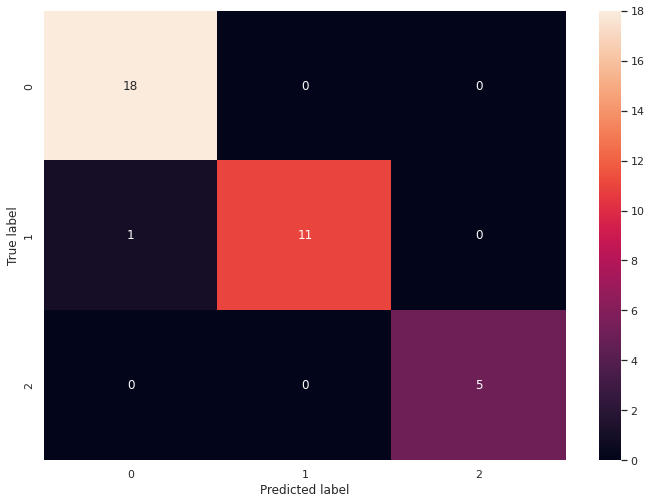

In [65]:
#more visual approach
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

More detailed metrics?

In [66]:
print('Accuracy: {:.2f}'.format(sk.metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(sk.metrics.precision_score(y_test, y_pred, average='micro')))
print('Recal: {:.2f}'.format(sk.metrics.recall_score(y_test, y_pred, average='micro')))

Accuracy: 0.97
Precision: 0.97
Recal: 0.97


<img src='http://drive.google.com/uc?export=view&id=1qWrKY9TgpgQaBCzZfz1xLTV6iCeSwfmG' width="100">

### <font color='darkorange'>Hyperparameters</font>
 

Decision tree algorithms have a number of hyperparameters that can be tuned to acheive better predictions. Let's take a look at one and how we can tune it!
 
 

First we need some way to test how model performance varies as we change the parameter. We can't use the testing dataset... if we did it really wouldn't be a good test. I.e., the testing data would be used to help build the model and so would not be independent. 

So let's split the training dataset again! This will create training and validation datasets! 

In [67]:
X_hyper_train, X_hyper_val, y_hyper_train, y_hyper_val = train_test_split(X_train, y_train, test_size=0.20)

Let's next focus on the max depth parameter, and see if we can find a value that maximizes the performance of the model on the validation dataset.


> We'll first build a function that takes as input max depth, and outputs the accuracy score.
 
> We'll then use a loop to try out many max depth scores.
 
> Finally we'll plot the the accuracy scores for each max depth value.

Let's first build a function the takes max depth as input and outputs a accuracy score.

In [76]:
def fit_decision_tree(maxDep):

  #1. build the algorithm
  classifier = DecisionTreeClassifier(max_depth=maxDep)

  #2. Fit the algorithm
  classifier_res = classifier.fit(X_hyper_train, y_hyper_train)

  #3. Make predictions
  y_pred = classifier.predict(X_hyper_val)

  #4. Meausure the accuracy
  accuracy_measured = sk.metrics.accuracy_score(y_hyper_val, y_pred)

  return accuracy_measured




Try out your new function!

In [77]:
fit_decision_tree(maxDep=4)

0.9285714285714286

Next let's build a loop and see what values of max depth give the best results!

In [111]:
acc_scores = []
upperDepth = 5
for i in range(1,upperDepth):
  acc_s = fit_decision_tree(i)
  acc_scores.append(acc_s.round(3))

#acc_scores

Then let's plot it!

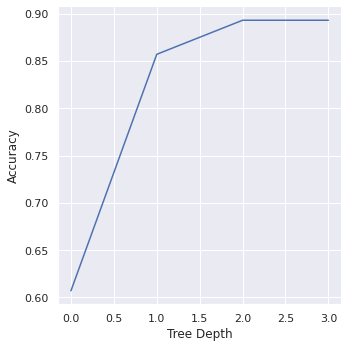

In [112]:
#create a dataframe
df_plot_maxDep = pd.DataFrame({'accuracy':acc_scores, 'maxDep':range(1,upperDepth)})

#make a plot
fig = sns.relplot(data=df_plot_maxDep['accuracy'], kind='line', )
fig.set_axis_labels('Tree Depth', 'Accuracy')

### <font color='darkorange'>Bonus</font> 
 

Try this exercise again but this time use min_samples_split. Which is the parameter that defines when splits are no longer considered (e.g., if a leaf has 10 points in it and min_samples_split is 11 then the algorithm will not look to split the leaf.



### <font color='darkorange'>Model interpretation</font> 

Decision trees can offer some nice visuals that can help interpret and communicate your results, lets take a look at a few.

In [110]:
!pip install dtreeviz
from dtreeviz.trees import dtreeviz 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 165 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.6-py3-none-any.whl size=67326 sha256=22f82691d860abbeba9561a480289277351955e57aadd7bea03b00b2ab7219c9
  Stored in directory: /root/.cache/pip/wheels/33/76/fe/99227ff871766e7284bb88d3d28e2f4886b8ec04d669033478
Successfully built dtreeviz


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atlea

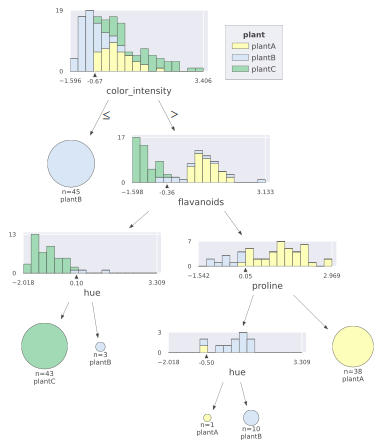

In [113]:
#build the figure
viz = dtreeviz(classifier_res, X_train, y_train,
                target_name="plant",
                feature_names=X_train.columns.to_list(),
                class_names={0:'plantA',1:'plantB',2:'plantC'},
                scale=1.0)

#take a look
viz

Let's look at how the tree does with the test data.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


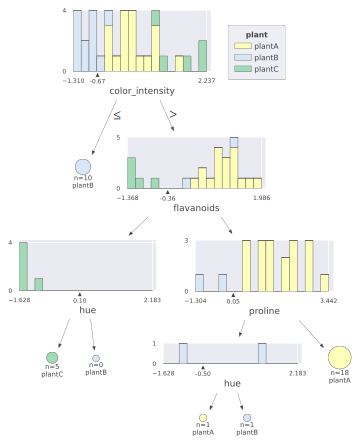

In [114]:
#build the figure
viz_test = dtreeviz(classifier_res, X_test, y_test,
                target_name="plant",
                feature_names=X_train.columns.to_list(),
                class_names={0:'plantA',1:'plantB',2:'plantC'},
                scale=1)

#take a look
viz_test

In [115]:
#Vizualize one prediction 
import numpy as np
# pick random X test point
X_values_for_pred = X_test.iloc[12] #you can choose any other row!

X_values_for_pred

alcohol                         1.451426
malic_acid                     -0.350555
ash                             0.126230
total_sugar                     1.848633
alcalinity_of_ash              -0.282192
magnesium                       0.212227
total_phenols                   0.766625
flavanoids                      0.977420
nonflavanoid_phenols           -0.379701
proanthocyanins                 1.309097
color_intensity                 0.503657
hue                             0.537397
od280/od315_of_diluted_wines    0.221012
proline                         1.237849
lab_lab1                        0.000000
lab_lab2                        1.000000
lab_lab3                        0.000000
Name: 48, dtype: float64

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


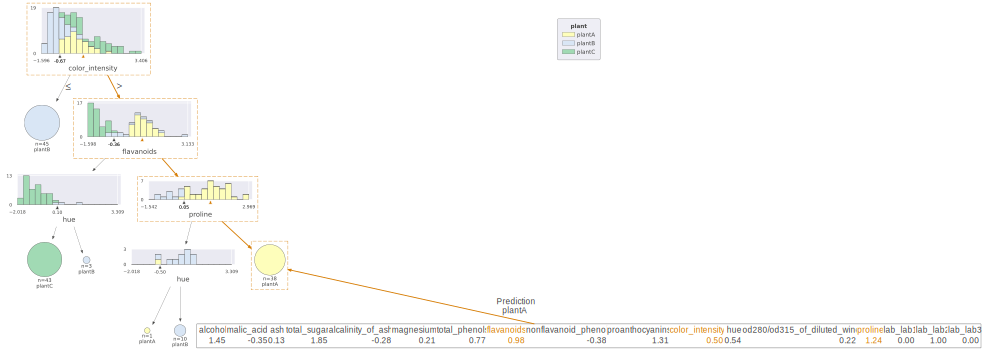

In [116]:
#build the figure
viz_one_pred = dtreeviz(classifier_res, X_train, y_train,
                target_name="plant",
                feature_names=X_train.columns.to_list(),
                class_names={0:'plantA',1:'plantB',2:'plantC'},
                scale=0.75,
                X=X_values_for_pred)

#take a look
viz_one_pred

In [ ]:
y_test.iloc[12]

### <font color='darkorange'>Bonus 2</font> 

Now that you know how to use decision tree models, try going back to one of the datasets we've already worked on and see if you can get better predictions? Can you still explain what features are helping you to make those predictions?

In [119]:
df_cancer = pd.read_csv('/content/cleaned_cancer_data.csv')
df_cancer

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,benign,technician_1,technician_2,technician_3,technician_4
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.66560,0.7119,0.2654,0.4601,0.11890,0.0,0,1,0,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,0.18660,0.2416,0.1860,0.2750,0.08902,0.0,0,0,1,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,0.42450,0.4504,0.2430,0.3613,0.08758,0.0,0,0,1,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,0.86630,0.6869,0.2575,0.6638,0.17300,0.0,1,0,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,0.20500,0.4000,0.1625,0.2364,0.07678,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.21130,0.4107,0.2216,0.2060,0.07115,0.0,0,0,1,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.19220,0.3215,0.1628,0.2572,0.06637,0.0,0,0,0,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.30940,0.3403,0.1418,0.2218,0.07820,0.0,0,0,1,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,0.86810,0.9387,0.2650,0.4087,0.12400,0.0,0,0,1,0


In [126]:
scaling_columns_cancer = df_cancer.drop('benign',axis=1).select_dtypes(include='number').columns.tolist()

######################################
#split data into predictors (X) and target (y)
Xcancer = df_cancer.drop('benign', axis=1)
ycancer = df_cancer['benign']

#split these data into training and testing datasets
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(Xcancer, ycancer, test_size=0.20)


#1 build the scaler 
scaler2 = StandardScaler()

#2 apply it
X_train_cancer[scaling_columns_cancer] = scaler2.fit_transform(X_train_cancer[scaling_columns_cancer])
X_test_cancer[scaling_columns_cancer] = scaler2.transform(X_test_cancer[scaling_columns_cancer])

X_train_cancer

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,technician_1,technician_2,technician_3,technician_4
482,-0.198811,-1.221861,-0.202872,-0.317341,0.775327,0.211480,-0.390753,0.086063,-0.110717,0.527963,...,0.308119,-0.034184,-0.428252,0.265194,0.515131,0.530842,-0.588348,1.781660,-0.632456,-0.527342
177,0.638803,0.178211,0.690289,0.479250,0.156806,0.970725,1.104876,1.004537,-0.056946,0.079282,...,0.403445,1.349044,1.463127,1.318213,0.236524,0.639951,-0.588348,-0.561274,1.581139,-0.527342
436,-0.366894,0.046304,-0.391826,-0.420458,-0.332241,-0.482822,-0.882029,-0.724236,0.183231,0.113359,...,-0.467492,-0.574588,-0.963200,-0.782710,0.653630,-0.368602,-0.588348,-0.561274,1.581139,-0.527342
408,1.067414,0.305491,1.035687,0.920627,0.529044,0.493593,0.375781,0.993821,0.652830,-0.281366,...,0.693758,0.754409,0.256396,1.226450,0.246186,0.065574,-0.588348,-0.561274,1.581139,-0.527342
141,0.540754,-0.298507,0.519621,0.423939,0.079403,0.177399,0.060128,0.258787,0.183231,-0.027209,...,-0.034190,-0.201984,0.021269,0.086181,-0.185414,-0.129466,-0.588348,1.781660,-0.632456,-0.527342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,-0.086755,-0.724315,-0.154110,-0.185595,-0.608781,-0.935529,-0.918361,-0.724746,-1.383295,-0.545463,...,-0.731806,-0.985473,-1.049994,-0.907267,-0.877907,-0.720238,-0.588348,-0.561274,1.581139,-0.527342
422,-0.719868,-0.768284,-0.684805,-0.701183,0.894950,0.236094,-0.229293,-0.110134,0.272849,0.075022,...,0.403445,-0.244093,-0.214329,-0.080798,-0.193466,-0.542724,-0.588348,-0.561274,-0.632456,1.896302
264,0.843304,0.631789,0.783749,0.744410,0.082921,-0.272278,0.012589,0.407784,0.204739,-0.975685,...,1.023067,0.009201,0.533459,1.241493,0.497416,-0.461881,1.699673,-0.561274,-0.632456,-0.527342
345,-1.098055,-1.071440,-1.061087,-0.941883,0.192693,-0.241227,-0.662316,-0.737758,-0.634087,1.047637,...,0.165129,-0.584796,-0.961551,-1.130206,-0.761955,0.057094,-0.588348,-0.561274,1.581139,-0.527342


In [127]:
Xc_hyper_train, Xc_hyper_val, yc_hyper_train, yc_hyper_val = train_test_split(X_train_cancer, y_train_cancer, test_size=0.20)

In [128]:
def fit_cancer_tree(maxDep):

  #1. build the algorithm
  classifierc = DecisionTreeClassifier(max_depth=maxDep)

  #2. Fit the algorithm
  classifier_res_c = classifierc.fit(Xc_hyper_train, yc_hyper_train)

  #3. Make predictions
  yc_pred = classifierc.predict(Xc_hyper_val)

  #4. Meausure the accuracy
  accuracy_measuredc = sk.metrics.accuracy_score(yc_hyper_val, yc_pred)

  return accuracy_measuredc



In [134]:
for i in range(1,5):
  acc= fit_cancer_tree(i)
  print(acc)

0.9120879120879121
0.945054945054945
0.945054945054945
0.9120879120879121


In [137]:

  #1. build the algorithm
classifierc = DecisionTreeClassifier(max_depth=4)

  #2. Fit the algorithm
classifier_res_c = classifierc.fit(Xc_hyper_train, yc_hyper_train)

  #3. Make predictions
yc_pred = classifierc.predict(Xc_hyper_val)

  #4. Meausure the accuracy
accuracy_measuredc = sk.metrics.accuracy_score(yc_hyper_val, yc_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


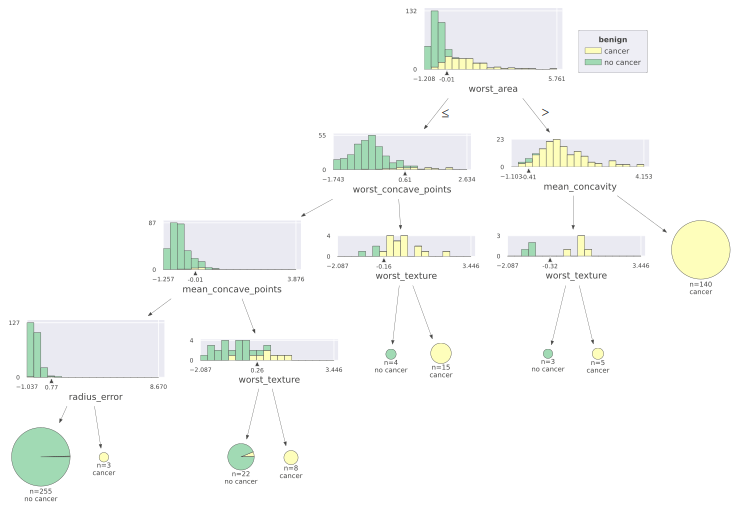

In [138]:
#build the figure
cancer_viz = dtreeviz(classifier_res_c, X_train_cancer, y_train_cancer,
                target_name="benign",
                feature_names=X_train_cancer.columns.to_list(),
                class_names={0:'cancer',1:'no cancer'},
                scale=1.0)

#take a look
cancer_viz

### <font color='darkorange'>Further reading</font>

> If you would like the notebook without missing code check out the [full code](https://colab.research.google.com/github/tbonne/peds/blob/main/docs/fullNotebooks/full_IntroModeling3_decisionTrees.ipynb) version.